In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import IPython
import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

# Sound processing
Impariamo a trattare segnali audio usando Python e le sue librerie.

Come abbiamo osservato, il suono è un segnale nel tempo. Un suono complesso è la sovrapposizione di suoni semplici (pensate all'orchestra). 

C'è un altro modo di caratterizzare il suono, **osservare il suo comportamento in frequenza**.


## La frequenza dei suoni

In acustica **frequenza** è il numero che definisce quante volte al secondo oscilla un onda sonora, si misura infatti in cicli al secondo, detti più comunemente Hertz (Hz).

Suoni acuti, alti, come quelli suonati da un violino, come un fischio o un sibilo, hanno frequenze dal numero alto (alte frequenze), suoni gravi, bassi, come un trombone, un basso elettrico o un tuono in lontananza, hanno numeri di frequenza piccoli (basse frequenze).

<font color="red">**Provate a variare il valore della variabile `frequenza` nello snippet di codice qui sotto (ad esempio usando i valori 110,220,440,880):**</font>

In [ ]:
frequenza=880

fs = 44100 # sampling frequency
T = 2    # seconds
tempi = np.linspace(0, T, int(T*fs), endpoint=False) # time variable


suono = np.sin(1*np.pi*frequenza*tempi)        

plt.xlim([0,0.01])
plt.plot(tempi, suono,'-b')

IPython.display.Audio(suono,rate=fs)

In [ ]:
# PROVATE A SOMMARE ONDE CON FREQUENZE DIVERSE

## I suoni in Fourier

 

 

### Suoni Bassi
Carichiamo in memoria il suono di un contrabbasso:

In [2]:
wavname_basso="contrabbasso.wav"
IPython.display.Audio(wavname_basso)

La funzione `wav.read` legge il file audio e restituisce il segnale e la frequenza di campionamento.

In [3]:
f_s, suono_basso = wav.read(wavname_basso) # Questo comando carica il segnale e restituisce : frequenza_campionamento, segnale

Usando la funzione 'len()', calcoliamo di quante osservazioni è composto il segnale. Ricostruiamo l'asse dei tempi disponendo ogni osservazione a distanza $T_s= 1/f_s$

In [4]:
N = len(suono_basso) 
T_s = 1/f_s 
t  = T_s * np.arange(N) 

In [5]:
## calcoliamo la trasformata di Fourier con la funzione np.fft.fft di numpy
f  = f_s/N * np.arange(N)
Fourier_basso = np.fft.fft(suono_basso)/N
freq_basso = np.fft.fftfreq(N, 1/f_s)


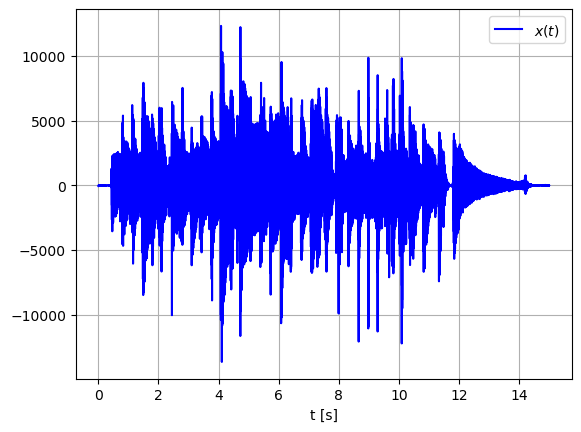

In [6]:
plt.plot(t, suono_basso,'-b',label=r"$x(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()

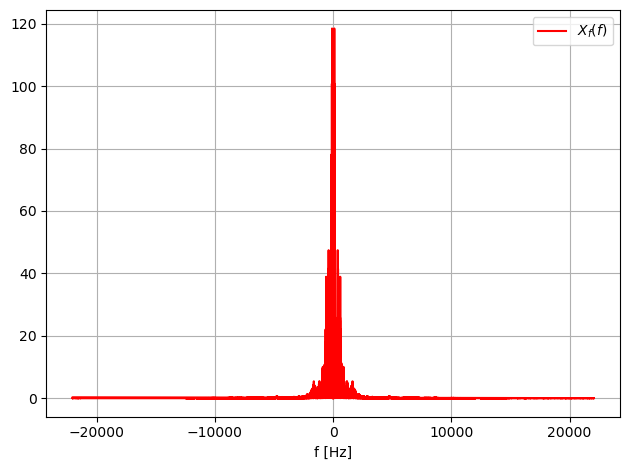

In [7]:
plt.plot(freq_basso,np.abs(Fourier_basso),'-r',label="$X_f(f)$") #tra $ formule matematiche Latex
plt.xlabel('f [Hz]')
plt.legend()
plt.tight_layout()
plt.grid()

Osserviamo che il grafico delle frequenze ha una forma molto caratteristica. Il segnale è "praticamente nullo" per frequenze **sopra** ai 2000 Hz.

###  Voce umana

In [ ]:
wavname_voce="voce_cantata.wav"
IPython.display.Audio(wavname_voce)

In [ ]:
f_s, suono_voce = wav.read(wavname_voce) # This command loads the wavfile as (sample_rate, signal)
N = len(suono_voce)
t  = 1/f_s * np.arange(N) 

In [ ]:
f  = f_s/N * np.arange(N)
Fourier_voce = np.fft.fft(suono_voce)/N
freq_voce = np.fft.fftfreq(N, 1/f_s)

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(t, suono_voce,'-b',label=r"$x(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()

In [ ]:
plt.subplot(2,1,2)
plt.plot(freq_voce,np.abs(Fourier_voce),'-r',label=r"$X(f)$")
plt.xlabel('f [Hz]')
plt.xlim([0,5e3])
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig(wavname_voce+'.png')

Osserviamo che il grafico delle frequenze ha una forma molto caratteristica. Il segnale ha tante componenti (tanti picchi), tutte **sotto** ai 4000 Hz. I picchi più intensi sono  tra i 500 e i 1000 Hz.

### Suoni Alti

Ora analizziamo il suono di un triangolo. 
<img src="triangle.png" width="200px">

In [ ]:
wavname_alto="triangolo16.wav"
IPython.display.Audio(wavname_alto)

In [ ]:
f_s, suono_triangolo = wav.read(wavname_alto) # This command loads the wavfile as (sample_rate, signal)
N = len(suono_triangolo)
tempi  = 1/f_s * np.arange(N) 

In [ ]:
f  = f_s/N * np.arange(N)
Fourier_triangolo = np.fft.fft(suono_triangolo) 
freq_triangolo = np.fft.fftfreq(N, 1/f_s)

In [ ]:
plt.plot(tempi, suono_triangolo,'-b',label=r"$x(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()
#plt.xlim([0.18,0.2])

In [ ]:
plt.plot(freq_triangolo,np.abs(Fourier_triangolo),'-r',label=r"$F$")
plt.xlabel('f [Hz]')
#plt.xlim([0,5e3])
plt.legend()
plt.tight_layout()
plt.grid()

Lo spettro di Fourier del triangolo è molto semplice. Possiamo provare a **isolare** alcune componenti.

## Filtrare suoni semplici

### Selezioniamo le frequenze **SOPRA** ad una soglia

Supponiamo di voler isolare alcune componenti del suono. Consideriamo la trasformata di Fourier del triangolo `Fourier_triangolo`. 
Supponiamo di voler ottenere un **nuovo** spettro fatto così:

<img src="passaalto.png">

Per fare questo, dobbiamo **rendere nullo** parte del segnale `Fourier_triangolo`. In particolare, proviamo a **tenere** solo la parte di segnale con frequenze sopra ai 4000 Hz. 

Ricordatevi che abbiamo il vettore delle frequenze `f` e il vettore della trasformata `Fourier_triangolo`. 

Dobbiamo individuare quali sono gli indici di `f` corrispondenti a $$f<4000$$. 

Per questo, usiamo la funzione `np.argwhere`. 

Usiamo poi questi indici per definire un nuovo segnale `Fourier_filtrato`.


In [ ]:
Fourier_filtrato=Fourier_triangolo.copy()

In [ ]:
indici = np.argwhere(abs(freq_triangolo)<4000)

Fourier_filtrato[indici]=0

plt.plot(freq_triangolo,np.abs(Fourier_filtrato),'-r',label=r"F")
plt.xlabel('f [Hz]')
#plt.xlim([0,5e3])
#plt.ylim([0,35])
plt.legend()
plt.grid()

Ora, per **ascoltare** quello che abbiamo ottenuto usiamo la **trasformata inversa di Fourier** che ci riporta nei segnali dipendenti dal tempo (cioè che si possono ascoltare). E poi lo ascoltiamo.

In [ ]:
suono_filtrato = np.fft.ifft(Fourier_filtrato)

plt.plot(tempi, suono_filtrato[:N],'-b',label=r"$y(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()

In [ ]:
IPython.display.Audio(suono_filtrato,rate=fs)

### Selezioniamo le frequenze **TRA** due soglie

Similmente, proviamo a **filtrare** tutte le componenti dello spettro che **non** sono comprese tra 1800 e 3000 Hz. 

In [ ]:
Fourier_filtrato = Fourier_triangolo.copy()

indici_sotto = np.argwhere(abs(freq_triangolo)<1800) 
indici_sopra = np.argwhere(abs(freq_triangolo)>3000)

Fourier_filtrato[indici_sotto]=0
Fourier_filtrato[indici_sopra]=0

plt.plot(freq_triangolo,np.abs(Fourier_filtrato),'-r',label=r"$Y(f)$")
plt.xlabel('f [Hz]')
#plt.xlim([0,5e3])
#plt.ylim([0,35])
plt.legend()
plt.grid()

In [ ]:
suono_filtrato = np.fft.ifft(Fourier_filtrato)

plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(tempi, suono_filtrato,'-b',label=r"$y(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()

In [ ]:
IPython.display.Audio(suono_filtrato,rate=fs)

## STFT e Spettrogramma della voce


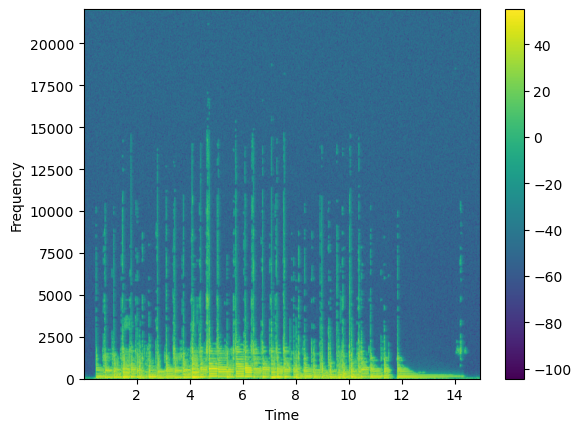

In [9]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(suono_voce, Fs=f_s,NFFT=1024)

plt.xlabel('Time')

plt.ylabel('Frequency')
plt.colorbar()
 

In [ ]:
plt.specgram??

 ## Cosa abbiamo imparato
 
 - Comprendere la relazione fra frequenza del segnale audio e suono
 - Comprendere il potenziale e i limiti del filtraggio in Fourier di un segnale audio, semplice o complesso
 - Interpretare lo spettrogramma di un segnale audio